## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your bcode here - remember to use markdown cells for comments as well!

# King County Housing Sale Prices

In this project I'm going to analyze the King's County housing data set listing various data points for property sales in the King's County area of Washington (centered around Seattle). I will be using Linear Regression to identify the most influential variables controlling sale price. For the purposes of this exercise, I will be working from the position as a consultant to a hypothetical Real Estate Agency interested in single falmily homes in the Seattle area. I will be using the OSEMN (Obtain, Scrub, Explore, Model, Interpret) Data Science process in this project.

## The Business Problem

The King's County data shows various figures of features for house sold in 2014 and 2015. As a consultant, I will try and identify the significant factors affecting the sale price of homes, so the agency could have a finest structure of how much a house entering the market would cost according to these specific factors. These factors will include location of the house, living area, number of bedrooms, grade/condition of the house etc. Such conceptual information could increase the agency's ability to provide valuable knowledge and information at each step for the clients while also coming up with an unbiased valuation of their home and help set a listing/buying price.

## Data Understanding

1. id - unique identified for a house 
2. Date - house was sold
3. Price - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.groupby('bedrooms').median()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,
1,3.336702e+09,299000.0,1.00,790.0,5748.0,1.0,0.0,0.0,3.0,6.0,760.0,1939.5,0.0,98116.5,47.56225,-122.316,1360.0,5635.5
2,3.904100e+09,374000.0,1.00,1140.0,5244.0,1.0,0.0,0.0,3.0,7.0,1010.0,1948.0,0.0,98116.0,47.60285,-122.316,1430.0,5400.0
3,3.856905e+09,413000.0,2.00,1680.0,7629.5,1.0,0.0,0.0,3.0,7.0,1440.0,1976.0,0.0,98059.0,47.56505,-122.231,1720.0,7688.5
4,4.029950e+09,549997.5,2.50,2410.0,8100.0,2.0,0.0,0.0,3.0,8.0,2080.0,1980.0,0.0,98056.0,47.57110,-122.192,2190.0,8000.0
5,4.036400e+09,620000.0,2.75,2870.0,8925.0,2.0,0.0,0.0,3.0,8.0,2190.0,1975.0,0.0,98056.0,47.58310,-122.209,2280.0,8550.0
6,3.876051e+09,650000.0,3.00,2955.0,8696.0,2.0,0.0,0.0,3.0,8.0,2340.0,1966.0,0.0,98097.0,47.60245,-122.269,2095.0,8241.0
7,3.618730e+09,728580.0,3.50,3335.0,8836.0,2.0,0.0,0.0,3.0,8.0,2820.0,1964.5,0.0,98104.0,47.62120,-122.282,2215.0,8088.0
8,3.756900e+09,700000.0,3.25,3840.0,7500.0,2.0,0.0,0.0,3.0,8.0,2530.0,1962.0,0.0,98105.0,47.63160,-122.303,1780.0,7624.0
9,5.863050e+09,817000.0,4.25,3755.0,5254.0,2.0,0.0,0.0,3.0,7.0,2680.0,1916.5,0.0,98105.0,47.66290,-122.308,2210.0,4360.0


## Scrubbing the data
### Cleaning based on info
Key observations from here:

1. Datatype of date: String
2. Waterfront is missing values
3. Sqft_basement has a datatype of object
4. yr_renovbated missing values
5. yr_renovated is float
6. Dealing with the date column

## Dealing with date column

In [5]:
df.date.value_counts()

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
5/15/2015       1
5/24/2015       1
11/30/2014      1
7/27/2014       1
5/17/2014       1
Name: date, Length: 372, dtype: int64


By looking at the most common values in the Date column, we see that houses seem to sold more in late spring and early summer. Lets take another look at this and see if we can extract the month in any way.

In [6]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<AxesSubplot:xlabel='month', ylabel='count'>

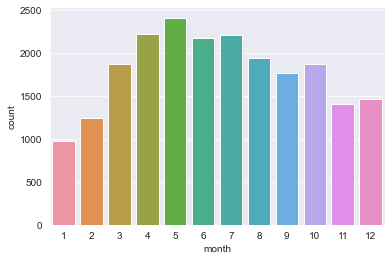

In [8]:
sns.countplot(x = "month", data = df)


So there appears to be certain months where more houses are sold. Lets take a look at the avg price of the homes during each month to see if there is any significant change by waiting to sell a house in the summer months.

<AxesSubplot:xlabel='month', ylabel='price'>

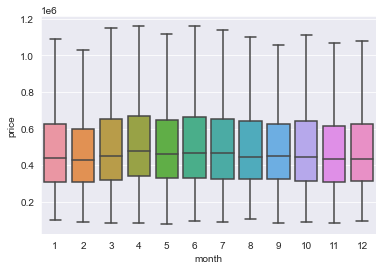

In [9]:
sns.boxplot(x = "month", y = "price", data = df, showfliers = False)

<AxesSubplot:xlabel='month', ylabel='price'>

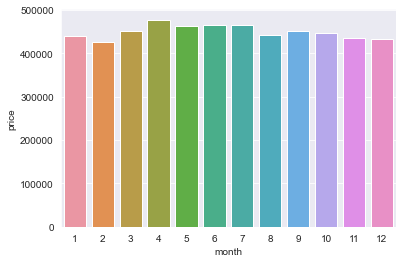

In [10]:
sns.barplot(x = "month", y = "price", data = df.groupby("month").median().reset_index())

In [11]:
df.groupby("month").median()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
month,,,,,,,,,,,,,,,,,,,
1,3.905036e+09,438500.0,3.0,2.25,1890.0,7800.0,1.0,0.0,0.0,3.0,7.0,1570.0,1974.0,0.0,98065.0,47.55950,-122.2310,1800.0,7700.0
2,3.997500e+09,426500.0,3.0,2.00,1830.0,7667.0,1.0,0.0,0.0,3.0,7.0,1489.0,1974.0,0.0,98059.0,47.56120,-122.2290,1800.0,7638.0
3,3.905040e+09,450000.0,3.0,2.25,1870.0,7560.0,1.0,0.0,0.0,3.0,7.0,1540.0,1973.0,0.0,98065.0,47.56480,-122.2260,1820.0,7647.0
4,4.022900e+09,477000.0,3.0,2.25,1900.0,7500.0,1.5,0.0,0.0,3.0,7.0,1540.0,1976.0,0.0,98072.0,47.56860,-122.2290,1840.0,7560.0
5,3.905005e+09,462000.0,3.0,2.25,1930.0,7498.0,1.0,0.0,0.0,3.0,7.0,1540.0,1974.0,0.0,98072.0,47.57870,-122.2365,1840.0,7551.5
6,3.904925e+09,465000.0,3.0,2.25,1980.0,7700.0,1.5,0.0,0.0,3.0,8.0,1600.0,1975.0,0.0,98072.0,47.57605,-122.2290,1890.0,7720.0
7,3.885801e+09,465000.0,3.0,2.25,1950.0,7695.0,1.5,0.0,0.0,3.0,8.0,1610.0,1977.0,0.0,98059.0,47.57400,-122.2150,1870.0,7650.0
8,4.016800e+09,442200.0,3.0,2.25,1940.0,7810.0,1.0,0.0,0.0,3.0,7.0,1590.0,1976.0,0.0,98059.0,47.57720,-122.2220,1860.0,7755.0
9,3.826501e+09,450000.0,3.0,2.25,1920.0,7620.0,1.5,0.0,0.0,3.0,7.0,1580.0,1974.0,0.0,98065.0,47.57400,-122.2350,1830.0,7503.0


Price of the same avg house changes by about $30k if you wait to see in the summer months. At this point it becomes clear that the month feature gives us a lot more information than the actual date. So we will be dropping date and just using the month from this point.

In [12]:
# df.drop(columns=['date'], inplace=True, axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Dealing with missing values in waterfront

In [14]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [15]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
dtype: int64

About 2300 values missing from waterfront, but we only have 146 houses with a waterfront. We need to explore whether we even need to include this variable. Lets check the avg prices of homes with a waterfront vs ones without a waterfront

<AxesSubplot:xlabel='waterfront', ylabel='price'>

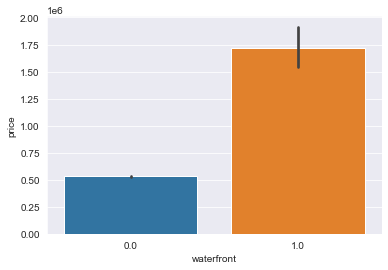

In [16]:
sns.barplot(x = "waterfront", y = "price", data = df)

In [17]:
# plt.figure(figsize=(20, 15))
# sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

In [18]:
s = df.waterfront.value_counts(normalize=True)
df['waterfront_fillna'] = df['waterfront']
df.loc[df.waterfront.isna(), 'waterfront_fillna'] = np.random.choice(s.index, p=s.values, size=df.waterfront.isna().sum())

In [19]:
df['waterfront_fillna'].value_counts(normalize = True)

0.0    0.992777
1.0    0.007223
Name: waterfront_fillna, dtype: float64


Now that we replicated the existing distribution of waterfront, we can drop the original column and rename the new one accordingly.

In [20]:
df.drop(columns=['waterfront'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   date               21597 non-null  object 
 2   price              21597 non-null  float64
 3   bedrooms           21597 non-null  int64  
 4   bathrooms          21597 non-null  float64
 5   sqft_living        21597 non-null  int64  
 6   sqft_lot           21597 non-null  int64  
 7   floors             21597 non-null  float64
 8   view               21534 non-null  float64
 9   condition          21597 non-null  int64  
 10  grade              21597 non-null  int64  
 11  sqft_above         21597 non-null  int64  
 12  sqft_basement      21597 non-null  object 
 13  yr_built           21597 non-null  int64  
 14  yr_renovated       17755 non-null  float64
 15  zipcode            21597 non-null  int64  
 16  lat                215

In [22]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'waterfront_fillna'],
      dtype='object')

In [23]:
df.columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'waterfront']

In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [25]:
# plt.figure(figsize=(20, 15))
# sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

## Dealing with floors data type

In [26]:
df['floors'] = df['floors'].astype('int64')
df['floors']

0        1
1        2
2        1
3        1
4        1
        ..
21592    3
21593    2
21594    2
21595    2
21596    2
Name: floors, Length: 21597, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int64  
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Dealing with sqft_basement data type

In [28]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
508.0     0.000046
1284.0    0.000046
143.0     0.000046
1135.0    0.000046
915.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [29]:
# df['sqft_basement']
print (df.sqft_basement[pd.to_numeric(df.sqft_basement, errors='coerce').isnull()])
# print(df.dtypes)

6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object


In [30]:
df.sqft_basement[pd.to_numeric(df.sqft_basement, errors='coerce').isnull()].value_counts()

?    454
Name: sqft_basement, dtype: int64

We can see that 454 values in the sqft_basement are missing and have the character '?' that needs to be taken care of.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int64  
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [32]:
df['sqft_basement'] = pd.to_numeric(df.sqft_basement, errors='coerce')
df['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [33]:
df['sqft_basement'].isna().value_counts()

False    21143
True       454
Name: sqft_basement, dtype: int64

In [34]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.606631
600.0     0.010263
500.0     0.009885
700.0     0.009838
800.0     0.009507
            ...   
915.0     0.000047
295.0     0.000047
1281.0    0.000047
2130.0    0.000047
906.0     0.000047
Name: sqft_basement, Length: 303, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int64  
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

From the data above since the median is 0 we are going to replace the nan values by 0 meaning they don't have a basement.

In [36]:
df.sqft_basement.fillna(value = 0.0, inplace=True)

In [37]:
df.sqft_basement.value_counts(normalize = True)

0.0       0.614900
600.0     0.010048
500.0     0.009677
700.0     0.009631
800.0     0.009307
            ...   
915.0     0.000046
295.0     0.000046
1281.0    0.000046
2130.0    0.000046
906.0     0.000046
Name: sqft_basement, Length: 303, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int64  
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Dealing with the yr_renovated

In [39]:
df['yr_renovated'] = pd.to_numeric(df.yr_renovated, errors='coerce')
df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

we would need to remove the null values and after that convert the data type to int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int64  
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

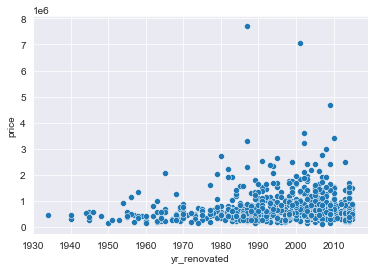

In [41]:
sns.scatterplot(x = "yr_renovated", y = "price", data = df[df['yr_renovated'] > 0])


Missing a lot of values here ~ 20%. Options include:

1. Filling missing values with just a zero (makes a lot more sense here as 96% of the homes have never been renovated)
2. Turn into a category of whether house has been renovated
3. Drop missing values.
4. Drop column
5. Turn into a category of whether house was renovated within the last 10 years

In [42]:
# plt.figure(figsize=(20, 15))
# sns.scatterplot(x = "long", y = "lat", hue = "yr_renovated",  data = df)

In [43]:
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Looks like most of the renovated houses are close to the waterfront. This might mean their prices tend to be higher. Lets investigate a bit more

lets look at the age of a building according to the year of renovation

In [44]:
yrs_since_reno = 2015 - df['yr_renovated']

In [45]:
yrs_since_reno.value_counts(normalize=True)

2015.0    0.958096
1.0       0.004112
2.0       0.001746
12.0      0.001746
8.0       0.001690
            ...   
62.0      0.000056
65.0      0.000056
39.0      0.000056
69.0      0.000056
71.0      0.000056
Name: yr_renovated, Length: 70, dtype: float64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int64  
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

Fill in the missing values of yr_renovated with 0s assuming they have never been renovated.

In [47]:
df.yr_renovated.fillna(value=0.0, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int64  
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

drop the na values of view since they are very small compared to our data and of least relevence

In [49]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [50]:
df.dropna(inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  int64  
 8   view           21534 non-null  float64
 9   condition      21534 non-null  int64  
 10  grade          21534 non-null  int64  
 11  sqft_above     21534 non-null  int64  
 12  sqft_basement  21534 non-null  float64
 13  yr_built       21534 non-null  int64  
 14  yr_renovated   21534 non-null  float64
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_l

## Dealing with zipcode

In [52]:
grouped = df.groupby(by= 'zipcode').median()
grouped.reset_index(inplace=True)

In [53]:
# plt.bar(x='zipcode', height= 'price', data=grouped)
# sns.barplot(y='zipcode', x= 'price', data=grouped)

In [54]:
# plt.figure(figsize=(20, 15))
# sns.scatterplot(x = "long", y = "lat", hue = 'zipcode', palette= 'Accent', data = df)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

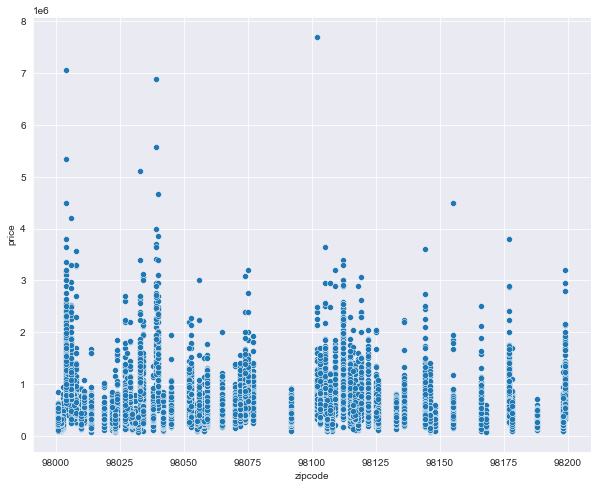

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = "zipcode", y = "price",  data = df)

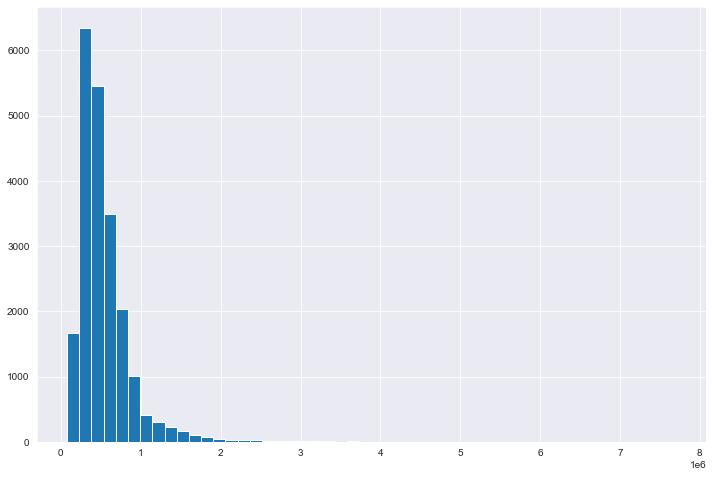

In [56]:
plt.figure(figsize=(12,8))
plt.hist(df.price, bins=50);

In [57]:
# plt.figure(figsize=(12,6))
# plt.hist(zipcode, bins='auto');

In [58]:
# plt.figure(figsize=(20, 15))
# sns.scatterplot(x = "long", y = "lat", hue = 'price', palette= 'Accent', data = df)

I am trying to see if houses sold are concentrated in a specific zipcode and why it may be so. Also tyring to see if there is a relationship with the price of the house in a specific neighborhood that people are most interested in living.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

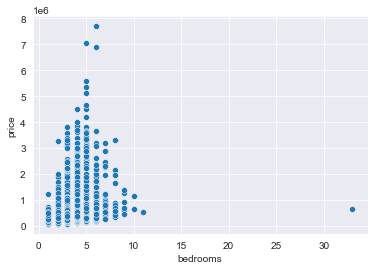

In [59]:
sns.scatterplot(y='price', x='bedrooms', data=df)

we see there is some inconsistency with the number of bedrooms and price. Seems a little weird and impractical so lets just consider the bedrooms less than 10 for now.

In [60]:
df.groupby(by='bedrooms').median()

,id,price,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,waterfront
bedrooms,,,,,,,,,,,,,,,,,,,,
1,3.336702e+09,299000.0,1.00,790.0,5748.0,1.0,0.0,3.0,6.0,760.0,0.0,1939.5,0.0,98116.5,47.56225,-122.316,1360.0,5635.5,7.0,0.0
2,3.904100e+09,374475.0,1.00,1140.0,5249.0,1.0,0.0,3.0,7.0,1010.0,0.0,1948.0,0.0,98116.0,47.60285,-122.316,1430.0,5400.0,6.0,0.0
3,3.861500e+09,413000.0,2.00,1680.0,7622.0,1.0,0.0,3.0,7.0,1440.0,0.0,1976.0,0.0,98059.0,47.56520,-122.231,1720.0,7688.0,6.0,0.0
4,4.036100e+09,549950.0,2.50,2410.0,8100.0,2.0,0.0,3.0,8.0,2080.0,0.0,1980.0,0.0,98056.0,47.57120,-122.192,2190.0,8000.0,6.0,0.0
5,4.036700e+09,619500.0,2.75,2870.0,8930.5,2.0,0.0,3.0,8.0,2190.0,680.0,1975.0,0.0,98058.0,47.58325,-122.209,2280.0,8549.5,6.0,0.0
6,3.876001e+09,650000.0,3.00,2955.0,8696.0,2.0,0.0,3.0,8.0,2340.0,850.0,1966.0,0.0,98097.0,47.60245,-122.269,2095.0,8241.0,6.0,0.0
7,3.618730e+09,728580.0,3.50,3335.0,8836.0,2.0,0.0,3.0,8.0,2820.0,340.0,1964.5,0.0,98104.0,47.62120,-122.282,2215.0,8088.0,6.0,0.0
8,3.756900e+09,700000.0,3.25,3840.0,7500.0,2.0,0.0,3.0,8.0,2530.0,1300.0,1962.0,0.0,98105.0,47.63160,-122.303,1780.0,7624.0,10.0,0.0
9,5.863050e+09,817000.0,4.25,3755.0,5254.0,2.0,0.0,3.0,7.0,2680.0,895.0,1916.5,0.0,98105.0,47.66290,-122.308,2210.0,4360.0,4.0,0.0


Ok looks like starting from 10 bedrooms price actually goes down. Also it doesn't make sense that a 10 bedroom house would only have 3 bathrooms since the standard ratio of the number of bathrooms needed in a home is two for every three rooms.

So for our analysis lets just consider the houses with less than 9 bedrooms.

In [61]:
df = df[df['bedrooms'] < 9]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21523 non-null  int64  
 1   date           21523 non-null  object 
 2   price          21523 non-null  float64
 3   bedrooms       21523 non-null  int64  
 4   bathrooms      21523 non-null  float64
 5   sqft_living    21523 non-null  int64  
 6   sqft_lot       21523 non-null  int64  
 7   floors         21523 non-null  int64  
 8   view           21523 non-null  float64
 9   condition      21523 non-null  int64  
 10  grade          21523 non-null  int64  
 11  sqft_above     21523 non-null  int64  
 12  sqft_basement  21523 non-null  float64
 13  yr_built       21523 non-null  int64  
 14  yr_renovated   21523 non-null  float64
 15  zipcode        21523 non-null  int64  
 16  lat            21523 non-null  float64
 17  long           21523 non-null  float64
 18  sqft_l

## Dealing with Bathrooms

Notice that there are 75 houses with no bathrooms according to the data. Let's see what these look like.

In [63]:
# df.bathrooms.value_counts()

In [64]:
df.bathrooms.value_counts(normalize=True)

2.50    0.249222
1.00    0.178460
1.75    0.140965
2.25    0.094643
2.00    0.089439
1.50    0.066952
2.75    0.055057
3.00    0.034754
3.50    0.033917
3.25    0.027180
3.75    0.007202
4.00    0.006272
4.50    0.004553
4.25    0.003578
0.75    0.003299
4.75    0.001069
5.00    0.000976
5.25    0.000558
5.50    0.000465
1.25    0.000418
6.00    0.000232
0.50    0.000186
5.75    0.000186
8.00    0.000093
6.25    0.000093
6.50    0.000093
6.75    0.000093
7.75    0.000046
Name: bathrooms, dtype: float64

Houses with 0 bathrooms account for less than 0.35% of our data which may not be a lot but it is safer to deal with them by replacing with appropriate values according to the standard of housing instead of dropping them.

In [65]:
df.loc[df['bathrooms']==0, 'bedrooms'].value_counts()


Series([], Name: bedrooms, dtype: int64)

 According to the standard ratio of the number of bathrooms needed in a home is two for every three rooms. So I will assign 1 bathroom to  1-2 bedrooms and 2 bathrooms to 3-4 bedrooms.

In [66]:
df.loc[df['bathrooms']< 1, 'bedrooms']

208      2
264      1
350      1
465      1
569      2
        ..
19183    3
19329    2
20001    1
21594    2
21596    2
Name: bedrooms, Length: 75, dtype: int64

In [67]:
# bathroom_replace = df.loc[df['bathrooms']<1]
# bathroom_replace

In [68]:
#replace 0 bathrooms with 1 for 1-2 bedrooms.
# df['bathrooms'] = np.where(
#    (df['bathrooms'] == 0) & (df['bedrooms'] < 3) , 1, df['bathrooms'])

In [69]:
#replace 0 bathrooms with 2 for 3-4 bedrooms.
# df['bathrooms'] = np.where(
#    (df['bathrooms'] == 0) & (df['bedrooms'] > 2) , 2, df['bathrooms'])

In [70]:
# df.loc[df['bathrooms']==0, 'bedrooms'].value_counts()


In [71]:
# df.bathrooms.value_counts(normalize=True)

It may not affect the data by a significantly large amount but atleast we didn't lose data.

## Dealing with duplicates if any.

In [72]:
df.id.duplicated().sum()

177

looks like we have duplicates of the ids and this could mean that some houses may have been sold multiple times. I am going to keep the most recent sale and drop the duplicates.

In [73]:
duplicates = df.loc[df.id.duplicated()]
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,waterfront
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1,0.0,3,...,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,12,0.0
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1,3.0,3,...,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,12,0.0
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1,0.0,3,...,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,3,0.0
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1,0.0,3,...,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138,12,0.0
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1,0.0,5,...,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2,0.0,3,...,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260,2,0.0
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2,0.0,3,...,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466,12,0.0
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2,0.0,3,...,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992,3,0.0
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1,0.0,3,...,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598,5,0.0


In [74]:
dup_ids = duplicates['id']
dup_ids

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20165    7853400250
20597    2724049222
20654    8564860270
20764    6300000226
21565    7853420110
Name: id, Length: 177, dtype: int64

In [75]:
dup_ids_list = pd.DataFrame(dup_ids.value_counts(normalize=False, ascending=False))
dup_ids_list

,id
795000620,2
1922059278,1
5101402435,1
4139440480,1
6021501535,1
...,...
7977201065,1
3432501415,1
726049190,1
5101405604,1


In [76]:
test = df[df['id'] == 795000620]
test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,waterfront
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1,0.0,2,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,9,0.0
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1,0.0,2,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,12,0.0
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1,0.0,2,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,3,0.0


As we can see from the table the date a property was sold and the price do seem to increase so it would be a good idea to keep the duplicates to help keep track of the trend of price of a period of time. Also the more the data the better.

In [77]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [78]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,waterfront,year
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0.0,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,0.0,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0.0,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0.0,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,0.0,2015


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21523 non-null  int64  
 1   date           21523 non-null  object 
 2   price          21523 non-null  float64
 3   bedrooms       21523 non-null  int64  
 4   bathrooms      21523 non-null  float64
 5   sqft_living    21523 non-null  int64  
 6   sqft_lot       21523 non-null  int64  
 7   floors         21523 non-null  int64  
 8   view           21523 non-null  float64
 9   condition      21523 non-null  int64  
 10  grade          21523 non-null  int64  
 11  sqft_above     21523 non-null  int64  
 12  sqft_basement  21523 non-null  float64
 13  yr_built       21523 non-null  int64  
 14  yr_renovated   21523 non-null  float64
 15  zipcode        21523 non-null  int64  
 16  lat            21523 non-null  float64
 17  long           21523 non-null  float64
 18  sqft_l

We don't seem to need the date for now since we have the month and the year.

In [80]:
df.drop('date', axis=1, inplace=True)

## Dealing with price range for our spectrum of interest

Since we are working on creating a model to best fit our data for a realestate agency that buys and sells single family houses we are goung to assume for our calculations that the highest price for our analysis will be 1million because according to recent studies on housing King County continues to have the highest median price for homes and condos at $670,000 (up 7.2% from a year ago). Prices surged across most King County markets, with the typical Seattle single-family home selling for $805,000 as prices rose 6.6% from a year ago.

In [81]:
df.price.describe()

count    2.152300e+04
mean     5.399163e+05
std      3.660333e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [82]:

df.loc[df['price']>4500000, 'waterfront'].value_counts(normalize=True)
# df.loc[df['bathrooms']==0, 'bedrooms'].value_counts()


0.0    0.571429
1.0    0.428571
Name: waterfront, dtype: float64

This is an interesting finding. Although I was reluctant to limit the data to a price range below 1 million, noticing that a house with the same number of bedrooms could have an advantage if it is located where it would have a water front. As we can see 50% of the houses sold for more than 4.5 million do have a waterfront.

In [83]:
df.loc[df['price']<4500000, 'yr_built'].value_counts(normalize=True)

2014    0.025935
2006    0.021055
2005    0.020823
2004    0.019940
2003    0.019475
          ...   
1933    0.001394
1901    0.001348
1902    0.001255
1935    0.001116
1934    0.000976
Name: yr_built, Length: 116, dtype: float64

In [84]:
# df.loc[df['price']<4000000, 'waterfront'].value_counts(normalize=True)

In [85]:
(df['price']< 1500000).value_counts(normalize=True)

True     0.975282
False    0.024718
Name: price, dtype: float64

Although first time home buyers may not be interested in buying a 4.5 million home

In [86]:
# df = df.loc[df['price'] < 1500000]

In [87]:
df.price.value_counts(normalize=True)

350000.0    0.007945
450000.0    0.007899
550000.0    0.007387
500000.0    0.007062
425000.0    0.006969
              ...   
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
575575.0    0.000046
884744.0    0.000046
Name: price, Length: 3611, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

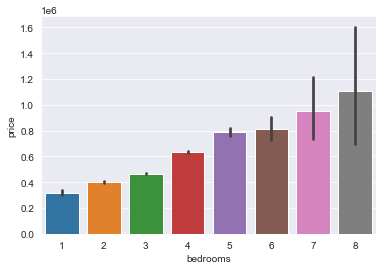

In [88]:
sns.barplot(x='bedrooms', y='price', data=df)

Now that the data is all cleaned we will move on to the next step which is the data exploration.

## Exploring data

Dealing with multicollinearity

<AxesSubplot:>

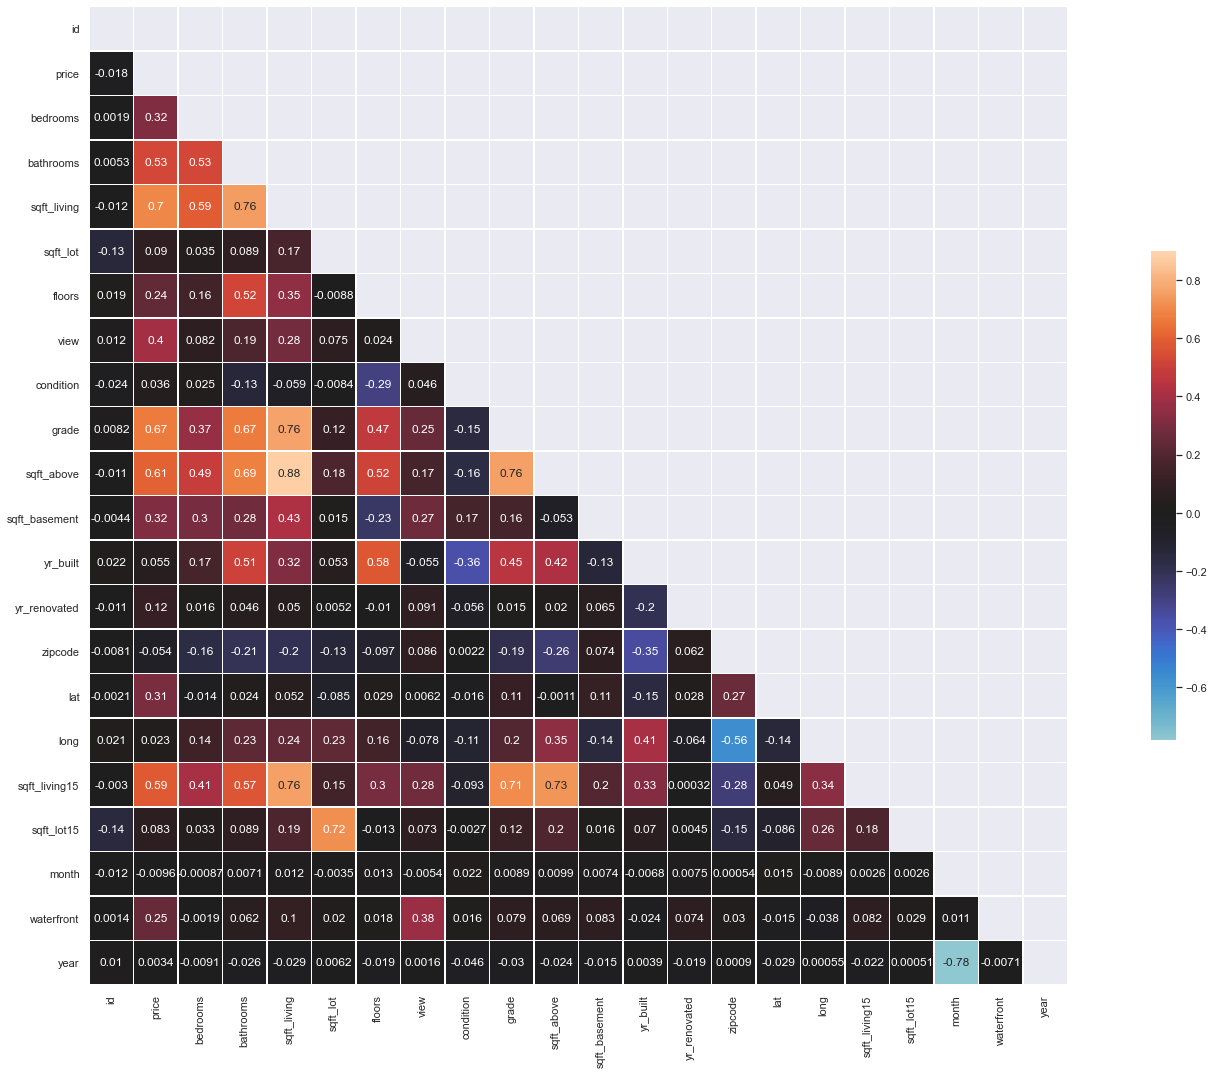

In [89]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="dark")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 18))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=0.9, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [90]:
# plt.figure(figsize=(30,20))
# sns.pairplot(df)

In [91]:
#droping the sqft_above column since it is highly correlated with sqft_living and 
#and it is irrelevant to our analysis as compared
df.drop(columns=["sqft_above"], inplace= True, axis = 1)


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21523 non-null  int64  
 1   price          21523 non-null  float64
 2   bedrooms       21523 non-null  int64  
 3   bathrooms      21523 non-null  float64
 4   sqft_living    21523 non-null  int64  
 5   sqft_lot       21523 non-null  int64  
 6   floors         21523 non-null  int64  
 7   view           21523 non-null  float64
 8   condition      21523 non-null  int64  
 9   grade          21523 non-null  int64  
 10  sqft_basement  21523 non-null  float64
 11  yr_built       21523 non-null  int64  
 12  yr_renovated   21523 non-null  float64
 13  zipcode        21523 non-null  int64  
 14  lat            21523 non-null  float64
 15  long           21523 non-null  float64
 16  sqft_living15  21523 non-null  int64  
 17  sqft_lot15     21523 non-null  int64  
 18  month 

In [93]:
df.to_csv("house_sale_cleaned.csv", index=False)

In [94]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,waterfront,year
0,7129300520,221900.0,3,1.00,1180,5650,1,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0.0,2014
1,6414100192,538000.0,3,2.25,2570,7242,2,0.0,3,7,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,0.0,2014
2,5631500400,180000.0,2,1.00,770,10000,1,0.0,3,6,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0.0,2015
3,2487200875,604000.0,4,3.00,1960,5000,1,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0.0,2014
4,1954400510,510000.0,3,2.00,1680,8080,1,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3,0.0,3,8,...,2009,0.0,98103,47.6993,-122.346,1530,1509,5,0.0,2014
21593,6600060120,400000.0,4,2.50,2310,5813,2,0.0,3,8,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2,0.0,2015
21594,1523300141,402101.0,2,0.75,1020,1350,2,0.0,3,7,...,2009,0.0,98144,47.5944,-122.299,1020,2007,6,0.0,2014
21595,291310100,400000.0,3,2.50,1600,2388,2,0.0,3,8,...,2004,0.0,98027,47.5345,-122.069,1410,1287,1,0.0,2015


In [95]:
df.year.value_counts()

2014    14580
2015     6943
Name: year, dtype: int64